In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [6]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import pandas as pd
import random, time
from babel.dates import format_date, format_datetime, format_time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score

In [4]:
import torch
from torch import Tensor
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.nn.functional as F

In [4]:
import transformers, os
from transformers import BertModel, AutoModel, AdamW, get_linear_schedule_with_warmup, BertTokenizer, BertForSequenceClassification

: 

: 

In [ ]:
from transformers import pipeline; 

In [7]:
# Check device 
# Get the GPU device name if available.
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available. {}'.format(torch.cuda.device_count()))
    print('We will use the GPU: {}'.format(torch.cuda.get_device_name(0)))

# If we dont have GPU but a CPU, training will take place on CPU instead
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
    
torch.cuda.empty_cache()
    
# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

No GPU available, using the CPU instead.


In [57]:
# import small train and test datasets
train_neg = [tweet[:-1] for tweet in open('./twitter-datasets/train_neg.txt').readlines()]
train_pos = [tweet[:-1] for tweet in open('./twitter-datasets/train_pos.txt').readlines()]
test_data = [tweet[:-1] for tweet in open('./twitter-datasets/test_data.txt').readlines()]

# import vocab_cut
#vocab = [word[:-1] for word in open('/vocab_cut.txt').readlines()]

X, y = train_neg + train_pos, [-1 for i in range(len(train_neg))]+[1 for i in range(len(train_pos))]
df = pd.DataFrame(list(zip(y, X)), columns = ['label','text'], dtype = str)
df.drop_duplicates(inplace = True)

In [9]:
df.describe()

,label,text
count,181321,181321
unique,2,181307
top,-1,<user> thank you ! !
freq,91088,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181321 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   181321 non-null  object
 1   text    181321 non-null  object
dtypes: object(2)
memory usage: 4.2+ MB


# Get to know the data

<AxesSubplot:>

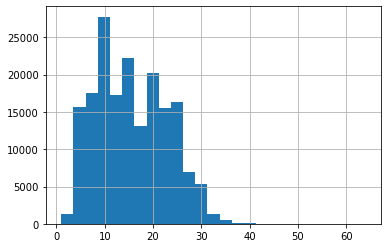

In [11]:
# get length of all the titles in the dataframe
seq_len_premise = [len(i.split()) for i in df['text']]

pd.Series(seq_len_premise).hist(bins = 25)

/Users/antoinedebouille/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

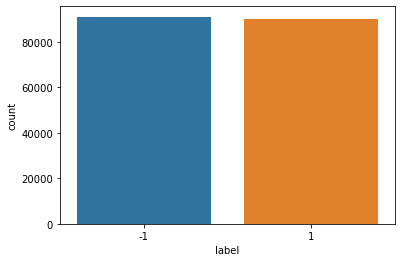

In [12]:
# Plot the count of fake and true news 
sns.countplot(df['label'])

## Wordclouds

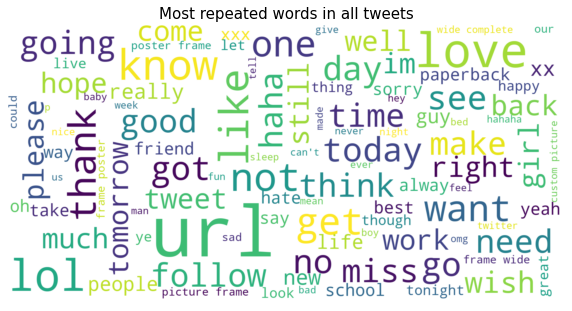

In [62]:
# Wordcloud of text

# Get stopwords
# Define nltk stopwords in english
#stop_words = stopwords.words('english')
stop_words_2 = ['i', 'me', 'my', 'myself', 'we','url' 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain']
stop_words = stop_words_2
stop_words.extend(['u', 'wa', 'ha','ho', 'would', 'com', 'user','<user>', '<rt>' 'url', 'rt', 'custom picture', 'i\'m', 'picture frame','<url>', 'positer frame', 'x','i\'ll'])
stop_words.remove('not')
stop_words.remove('no')
stop_words.remove('nor')

# Get a string of all the texts available
data_text = ",".join(txt.lower() for txt in df.text)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(data_text)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in all tweets',fontsize=15)
plt.show()

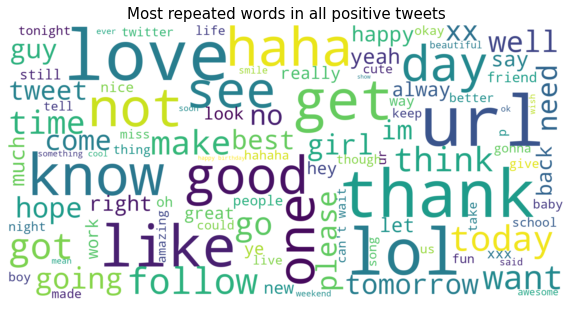

In [61]:
# Get a string of the positive tweets only
data_text_true = ",".join(txt.lower() for txt in df.text[df.label == "1"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(data_text_true)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in all positive tweets',fontsize=15)
plt.show()

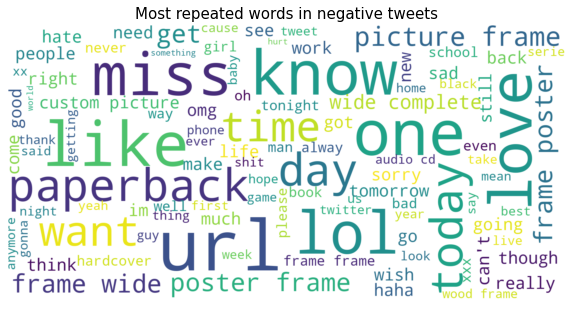

In [53]:
# Get a string of the negative tweets text only
data_text_fake = ",".join(txt.lower() for txt in df.text[df.label=="-1"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100,
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(data_text_fake)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in negative tweets',fontsize=15)
plt.show()

# Cleaning the data

In [72]:
def cleaning_data(df):

    #  Preprocess train dataset
    # remove special characters from text column
    df.text = df.text.str.replace('[#,@,&]', '')
    # Remove digits
    df.text = df.text.str.replace('\d*','')
    #Replace special characters
    df.text = df.text.str.replace('(','')
    df.text = df.text.str.replace(')','')
    df.text = df.text.str.replace('=','')
    df.text = df.text.str.replace('!','')
    df.text = df.text.str.replace('?','')
    df.text = df.text.str.replace('"','')
    df.text = df.text.str.replace('_','')
    df.text = df.text.str.replace('-','')
    df.text = df.text.str.replace(',','')
    df.text = df.text.str.replace('.','')
    df.text = df.text.str.replace(';','')
    df.text = df.text.str.replace('+','')
    df.text = df.text.str.replace('<user>','')
    df.text = df.text.str.replace('<rt>','')
    df.text = df.text.str.replace(':','')
    df.text = df.text.str.replace('/','')
    df.text = df.text.str.replace('<','')
    df.text = df.text.str.replace('>','')
    #Remove www
    df.text = df.text.str.replace('w{3}','')
    # remove urls
    df.text = df.text.str.replace("http\S+", "")
    # remove multiple spaces with single space
    df.text = df.text.str.replace('\s+', ' ')
    #remove all single characters (except I)
    df.text = df.text.str.replace(r'\s+[a-hA-H]\s+', '')
    df.text = df.text.str.replace(r'\s+[j-zJ-Z]\s+', '')
    df.text = df.text.str.replace(r'\s+[i-iI-I]\s+',' ')
    # Remove english stopwords
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

df = cleaning_data(df)
df.head()

/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_75169/1934799861.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('[#,@,&]', '')
/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_75169/1934799861.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('\d*','')
/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_75169/1934799861.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.text = df.text.str.replace('(','')
/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_75169/1934799861.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *no

,label,text,text_lemmatized
0,-1,vinco tresorpack difficulty object disassemble...,"[vinco, tresorpack, difficulty, object, disass..."
1,-1,glad dot taks tomorrow thankful startho,"[glad, dot, taks, tomorrow, thankful, startho]"
2,-1,vs celtics regular season fucked play playoffs,"[v, celtic, regular, season, fucked, play, pla..."
3,-1,could actually kill girl sorry,"[could, actually, kill, girl, sorry]"
4,-1,find hard believe im afraid,"[find, hard, believe, im, afraid]"


## Lemmatizing

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'love'),
  Text(1, 0, 'not'),
  Text(2, 0, 'like'),
  Text(3, 0, 'get'),
  Text(4, 0, 'lol'),
  Text(5, 0, 'one'),
  Text(6, 0, 'know'),
  Text(7, 0, 'go'),
  Text(8, 0, 'day'),
  Text(9, 0, 'frame')])

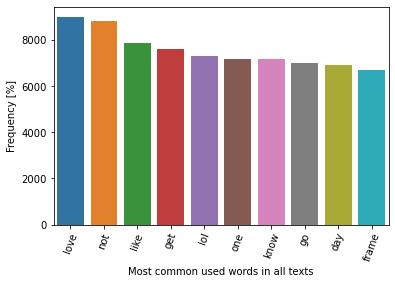

In [66]:
## Check the word frequency in texts

#lemmatize text column by using a lemmatize function
def lemmatize_text(text):
    ## Initialize the Lemmatizer and Whitespace Tokenizer
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text.lower())]


## Lemmatize words
df['text_lemmatized'] = df.text.apply(lemmatize_text)
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: [word for word in x if word not in stop_words])
#
## use explode to expand the lists into separate rows
wf_text = df.text_lemmatized.explode().to_frame().reset_index(drop=True)
## plot
sns.countplot(x='text_lemmatized', data=wf_text, order=wf_text.text_lemmatized.value_counts().iloc[:10].index)
plt.xlabel('Most common used words in all texts')
plt.ylabel('Frequency [%]')
plt.xticks(rotation=70)

# Vectorize

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [89]:
text = df['text']
df['label'] = df['label'].astype(int)
y = df['label'].to_numpy()#.reshape(-1,1)

In [90]:
print(y)

[-1 -1 -1 ...  1  1  1]


In [96]:
#adding two or three word sequences (bigrams or trigrams)
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(text)
X = ngram_vectorizer.transform(text)

In [97]:
print(X.shape)
print(y.shape)

(181321, 873639)
(181321,)


## Feature Extraction

In [74]:
#Feature extraction

from nltk.tokenize import word_tokenize

all_words = []

for message in text:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

# Print the result
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

word_features = [x[0] for x in all_words.most_common(1500)]

Number of words: 131956
Most common words: [("'s", 12539), ("n't", 11834), ('not', 9116), ('love', 8643), ('like', 7690), ('lol', 7311), ('get', 7219), ('know', 6879), ('one', 6829), ('frame', 6693), ('no', 6637), ('go', 6528), ('good', 5852), ('day', 5660), ('na', 5622)]


# SVD

In [100]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

clf = TruncatedSVD(100)
Xpca = clf.fit_transform(X)

In [101]:
print(Xpca.shape)

(181321, 100)


# Split data

In [106]:
#Before PCA
X_train, X_val, y_train, y_val = train_test_split(Xpca, y, train_size = 0.75)

## Logistic regression

In [107]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))


    #No PCA : 
    #Accuracy for C=0.01: 0.7686572102975888
    #Accuracy for C=0.05: 0.784408021001081
    #Accuracy for C=0.25: 0.7930775848756921
    #Accuracy for C=0.5: 0.7948644415521388
    #Accuracy for C=1: 0.7947100218393593

    #PCA : 100
    #Accuracy for C=0.01: 0.7027861728177186
    #Accuracy for C=0.05: 0.7003595773311861
    #Accuracy for C=0.25: 0.6990800997110146
    #Accuracy for C=0.5: 0.6985065407778341
    #Accuracy for C=1: 0.6982859411881494

Accuracy for C=0.01: 0.7027861728177186
Accuracy for C=0.05: 0.7003595773311861
Accuracy for C=0.25: 0.6990800997110146
Accuracy for C=0.5: 0.6985065407778341
Accuracy for C=1: 0.6982859411881494


In [110]:
final_ngram = LogisticRegression(C=0.01)
final_ngram.fit(X, y)
print ("Final Accuracy: %s" 
       % accuracy_score(y, final_ngram.predict(X)))

Final Accuracy: 0.7897926881056249


## Predictions

In [ ]:
#Preparing data
df_test = pd.DataFrame(list(test_data), columns = ['text'], dtype = str)
df_test =cleaning_data(df_test)
X_test = ngram_vectorizer.transform(df_test['text'])


In [116]:
print(X_test.shape)

(10000, 873639)


In [117]:
y_pred = final_ngram.predict(X_test)

In [118]:
print(y_pred)

[-1 -1 -1 ... -1  1 -1]
